In [1]:
%reset -f
%matplotlib inline

In [2]:
import pprint
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
mat = sio.loadmat("data/ex8movies.mat")
pprint.pprint(mat)

{'R': array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec '
               b' 1 17:19:26 2011',
 '__version__': '1.0'}


In [5]:
#y        = [n_movies, n_users] i.e. y[i,j] is rating for movie i by user j 
#is_rated = [n_movies, n_users] i.e. r[i,j] = 1 if user j rated movie i else 0
y        = mat["Y"]
is_rated = mat["R"]

In [6]:
mat = sio.loadmat("data/ex8movies-params.mat")
pprint.pprint(mat)

{'Theta':array([[ 0.28544362, -1.68426509,  0.26293877, ...,  0.76723235,
        -1.10460164, -0.25186708],
       [ 0.50501321, -0.45464846,  0.31746244, ...,  1.09306336,
        -1.20029436, -0.39161676],
       [-0.43191656, -0.47880449,  0.84671111, ...,  1.36333976,
        -0.32523542, -0.19468212],
       ...,
       [ 1.0586926 , -0.8087176 ,  0.56935771, ...,  0.80421422,
        -0.74346778, -0.11985885],
       [ 0.89058932, -0.12894734,  0.35560466, ...,  1.37426807,
        -0.7526549 , -0.81135311],
       [ 0.82414136, -0.38892594,  1.06940502, ...,  1.28423703,
        -0.98349993, -0.53184838]]),
 'X': array([[ 1.0486855 , -0.40023196,  1.19411945, ...,  0.861721  ,
        -0.69728994,  0.28874563],
       [ 0.78085123, -0.38562591,  0.52119779, ...,  0.70402073,
        -0.48583521, -0.56462407],
       [ 0.64150886, -0.54785385, -0.08379638, ...,  0.83854643,
        -0.69483208, -1.13479631],
       ...,
       [ 0.21952237, -0.20047886,  0.09257965, ...,  0.1459

In [7]:
#x     = [n_movies, n_features] i.e. x[i,j] is feature j for movie i
#theta = [n_users, n_features] i.e. theta[i,j] is parameter feature j for user i 
x     = mat["X"]
theta = mat["Theta"]

In [8]:
movie_ids = dict()

with open("data/ex8movie-ids.txt") as f:
    for line in f.readlines():
        line = line.strip()
        token = line.split(" ")
        movie_ids[int(token[0]) -1] = " ".join(token[1: ])

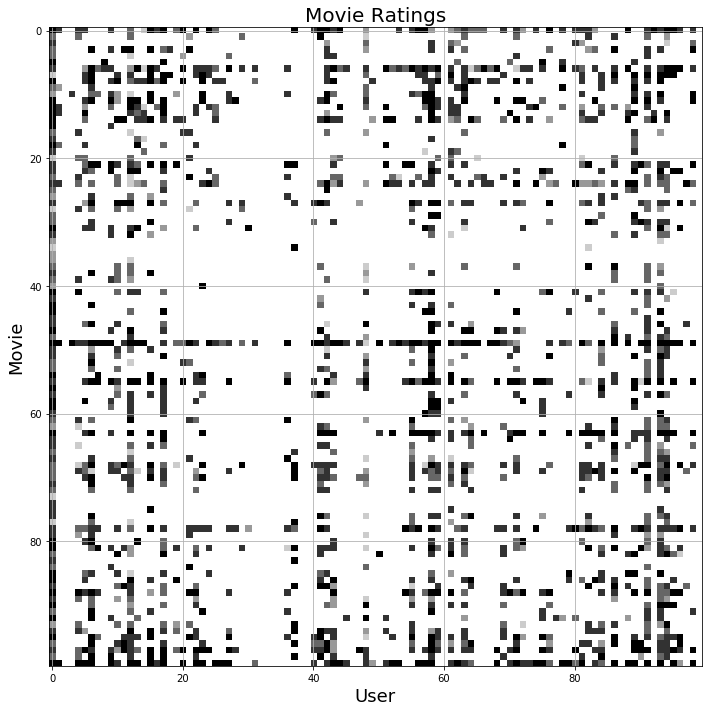

In [9]:
fig, ax = plt.subplots(figsize = (10.0, 10.0))
ax.imshow(y[:100,:100], cmap = "binary", interpolation = "nearest")
ax.set_title("Movie Ratings", fontsize = 20)
ax.set_xlabel("User", fontsize = 18)
ax.set_ylabel("Movie", fontsize = 18)
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [10]:
#add ratings for new user
ratings = np.zeros((1682, 1))

ratings[0]   = 4.0  
ratings[6]   = 3.0  
ratings[11]  = 5.0  
ratings[53]  = 4.0  
ratings[63]  = 5.0  
ratings[65]  = 3.0  
ratings[68]  = 5.0  
ratings[97]  = 2.0  
ratings[182] = 4.0  
ratings[225] = 5.0  
ratings[354] = 5.0

y        = np.append(y, ratings, axis = 1)  
is_rated = np.append(is_rated, ratings != 0, axis = 1)

In [11]:
model = sbbml.CollaborativeFiltering(alpha = 10.0, gamma = 10.0, n_features = 10)
model.fit(y, is_rated)

     fun: 71897.37402136312
     jac: array([ 0.12166403,  0.11040812,  0.12184334, ..., -0.00122504,
       -0.00196374,  0.0025596 ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3138
     nit: 1000
    njev: 3138
  status: 1
 success: False
       x: array([0.673913  , 0.33902349, 0.77393196, ..., 0.58927496, 0.75231093,
       0.73278188])

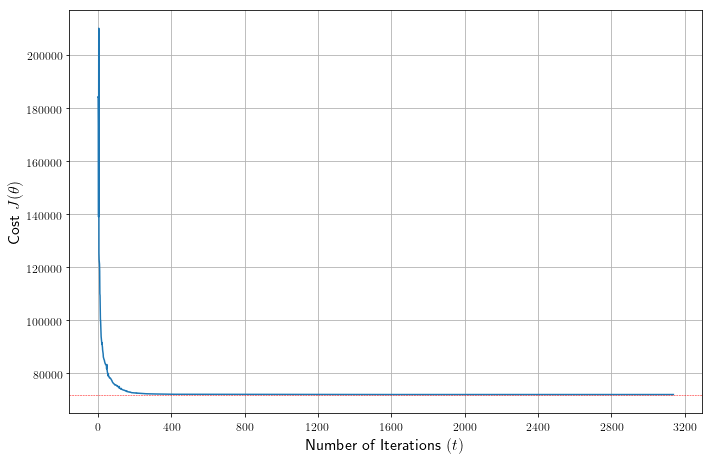

In [12]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [13]:
y_pred     = np.dot(model.x, model.theta.T)
y_pred_new = y_pred[:, -1] 
sorted_idx = np.argsort(y_pred_new, axis = 0)[::-1]

pred_movies = list()

for i in range(20):  
    k   = sorted_idx[i]
    tup = {"movie": movie_ids[k], "pred_rating": y_pred_new[k]}
    pred_movies.append(tup)

pd.DataFrame(pred_movies)

,movie,pred_rating
0,Titanic (1997),4.2892
1,Star Wars (1977),4.1198
2,Raiders of the Lost Ark (1981),3.9800
3,Good Will Hunting (1997),3.9089
4,"Shawshank Redemption, The (1994)",3.8863
5,Return of the Jedi (1983),3.8735
6,Braveheart (1995),3.8714
7,"Empire Strikes Back, The (1980)",3.8637
8,As Good As It Gets (1997),3.7579
9,Terminator 2: Judgment Day (1991),3.7578


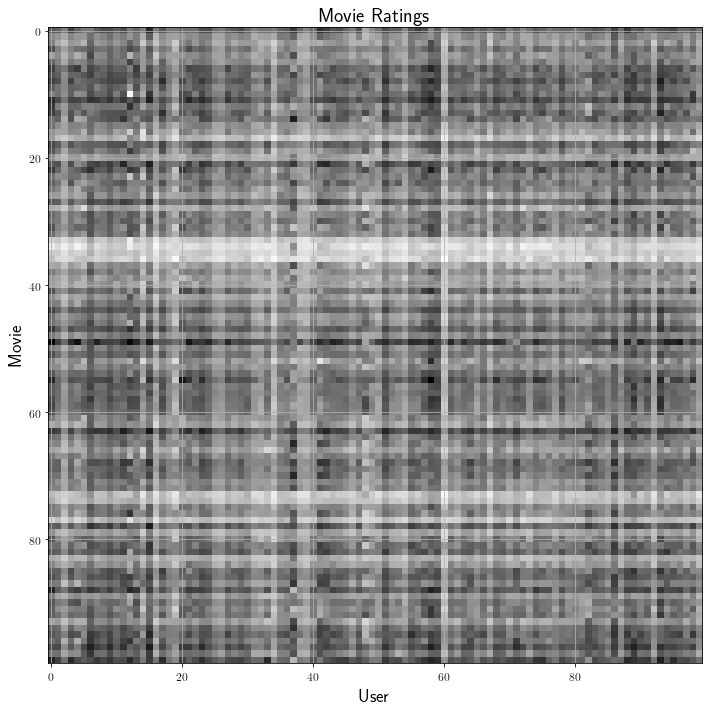

In [14]:
fig, ax = plt.subplots(figsize = (10.0, 10.0))
ax.imshow(y_pred[:100,:100], cmap = "binary", interpolation = "nearest")
ax.set_title("Movie Ratings", fontsize = 20)
ax.set_xlabel("User", fontsize = 18)
ax.set_ylabel("Movie", fontsize = 18)
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()